In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

In [2]:
# a) la fonction .shape nous permet de connaitre la taille de X et y

X.shape , y.shape

((1797, 64), (1797,))

In [3]:
# a) il y a donc 1797 d'exemples contenus dans la base de donnée

In [4]:
# b)

print(X[12])

[ 0.  0.  5. 12.  1.  0.  0.  0.  0.  0. 15. 14.  7.  0.  0.  0.  0.  0.
 13.  1. 12.  0.  0.  0.  0.  2. 10.  0. 14.  0.  0.  0.  0.  0.  2.  0.
 16.  1.  0.  0.  0.  0.  0.  6. 15.  0.  0.  0.  0.  0.  9. 16. 15.  9.
  8.  2.  0.  0.  3. 11.  8. 13. 12.  4.]


2

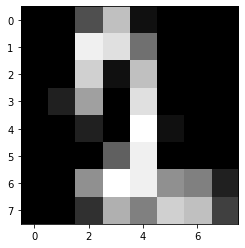

In [5]:
# c)

x = X[12]
x = np.reshape(x, (8,8))
plt.imshow(x, cmap='gray')

# On vérifie que cela correspond bien à y[12]
y[12]

In [6]:
# c) On a bien un 2

In [7]:
# d) On append dans a les indices où y vaut 0

a = []
for i in range(len(y)):
    if y[i] == 0:
        a.append(i)
y0 = np.array(a)

In [8]:
# d) Maintenant que l'on a y0 le sous tableau de y qui contient les lignes de X pour lequels l'image est 0 on cherche X0
# le sous tableau X avec uniquement les images de 0

X0= []
for i in range(len(y0)):
    b = X[y0[i]]
    X0.append(b)

In [9]:
# e) On cherche maintenant le "0 moyen" donc on fait la moyenne des pixels de tous les 0 pour chacun des 64 pixels

Moyen0 = X0[0].copy()
for i in range(64):
    temp = 0
    for j in range(178):
        temp = temp + X0[j][i]
    Moyen0[i] = temp/178

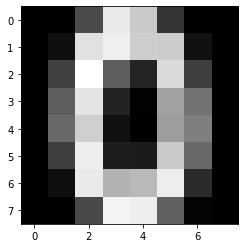

In [10]:
# e) On a notre "0 moyen"

x = Moyen0.copy()
x = np.reshape(x, (8,8))
plt.imshow(x, cmap='gray')

In [11]:
# f) On veut reproduire la meme chose pour les autres valeurs donc on définit les fonctions pour le faire

# d'abord y_valeur qui renvoie les indices pour lesquels y vaut n pour n entre 1 et 9
def y_valeur(n):
    a = []
    for i in range(len(y)):
        if y[i] == n:
            a.append(i)
    return np.array(a)

# Ensuite X_valeur qui renvoie le sous tableau de X contenant les images de n
def X_valeur(n,yn):
    Xn= []
    for i in range(len(yn)):
        b = X[yn[i]]
        Xn.append(b)
    return Xn

# On peut maintenant trouver le "n moyen" pour chaque valeur
def n_moyen(Xn):
    Moyenn = Xn[0].copy()
    for i in range(64):
        temp = 0
        for j in range(len(Xn)):
            temp = temp + Xn[j][i]
        Moyenn[i] = temp/len(Xn)
    return Moyenn

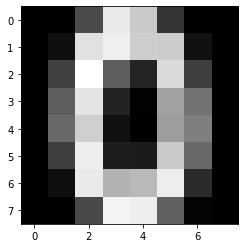

In [12]:
# f) On vérifie que les fonctions marchent bien en retrouvant le 0 moyen

test = n_moyen(X_valeur(0,y_valeur(0)))
test = np.reshape(test, (8,8))
plt.imshow(test, cmap='gray')

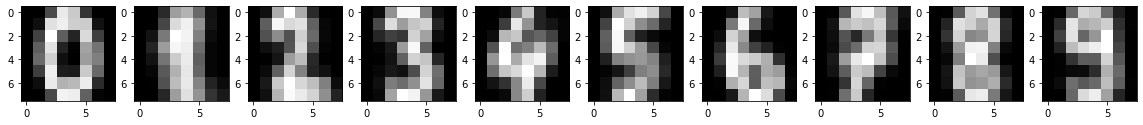

In [13]:
# f) On a bien retrouvé notre "0 moyen" donc on peut reproduire la meme chose pour les autres valeurs

val = [0 for i in range(10)]
for i in range(10):
    val[i] = n_moyen(X_valeur(i,y_valeur(i)))
    val[i] = np.reshape(val[i], (8,8))
    
plt.figure(figsize=(20,2))
for i in range(10):
    ax = plt.subplot(1,10,i+1)
    ax.imshow(val[i], cmap='gray')

In [14]:
# g) On coupe les 1797 lignes en deux parties de taille 899 et 898

X_train = X[:899:]
y_train = y[:899:]
X_test = X[899::]
y_test = y[899::]

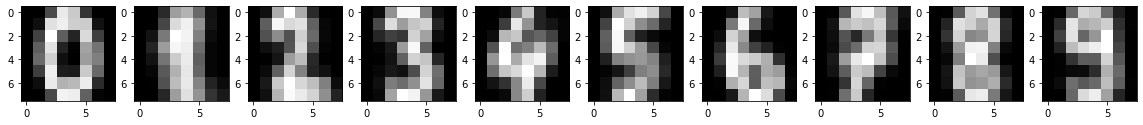

In [15]:
# h) On recherche maintenant les centroides pour X_train donc on reproduit les memes fonctions pour X_train et y_train

def y_valeur_train(n):
    a = []
    for i in range(len(y_train)):
        if y_train[i] == n:
            a.append(i)
    return np.array(a)

def X_valeur_train(n,yn):
    Xn= []
    for i in range(len(yn)):
        b = X_train[yn[i]]
        Xn.append(b)
    return Xn

# On peut garder la meme fonction n_moyen

centroids_train = [0 for i in range(10)]
for i in range(10):
    centroids_train[i] = n_moyen(X_valeur_train(i,y_valeur_train(i)))
    centroids_train[i] = np.reshape(centroids_train[i], (8,8))
    
# On a donc maintenant les centroides de X_train

plt.figure(figsize=(20,2))
for i in range(10):
    ax = plt.subplot(1,10,i+1)
    ax.imshow(val[i], cmap='gray')

In [16]:
# i) On cherche maintenant à savoir à quel centroide se rapproche le plus chaque image de X_test

# On a besoin que les lignes de centroids_train soient de taille 64
for i in range(10):
    centroids_train[i] = n_moyen(X_valeur_train(i,y_valeur_train(i)))

def prediction(X):
    # -1 sert à initialiser res
    res = np.array([-1 for i in range(len(X))])
    
    # i correspond à chaque image de X_test
    for i in range(len(X)):
        
        # 100 est arbitraire pour que 0 prenne la valeur à la première itération
        res_temp = np.array([100 for i in range(64)])
        res_val_temp = 0
        
        # j correspond aux 10 valeurs de centroides à tester
        for j in range(10):
            temp = abs(X[i]-centroids_train[j])
            val_temp = j
            if np.sqrt(np.sum(temp**2)) < np.sqrt(np.sum(res_temp**2)):
                res_temp = temp
                res_val_temp = val_temp
        res[i] = res_val_temp
    return res

In [17]:
# i) On a donc notre évalutation de X_test à partir des centroids

eval_test = prediction(X_test)

In [18]:
# j) On définit la fonction verif qui va calculer le pourcentage de bonne réponse de notre évaluation

def verif(X,y):
    res = 0
    l = len(X)
    for i in range(l):
        if X[i] == y[i]:
            res = res + 1
    return res/l * 100

In [19]:
verif(eval_test,y_test)

87.75055679287304

In [20]:
# j) On a donc environ 88% de bonne réponse

In [21]:
# Exercice 2

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
dic = {'mathématiques' : {'algèbre', 'analyse', 'arithmétique'}, \
'arithmétique' : {'algèbre', 'mathématiques', 'cryptographie'}, \
'algèbre' : {'analyse', 'mathématiques'}, \
'analyse' : {'algèbre', 'mathématiques'},
'cryptographie': set()}

In [24]:
# a) en annexe

In [25]:
# b)

dic2 = {0:{1,2,3}, 1:{0,2,4}, 2:{0,3}, 3:{0,2}, 4:{}}

In [26]:
# c)

def adjmat(graph):
    G = graph.copy()
    l = len(G)
    res = np.zeros((l,l))
    for i in range(l):
        for j in range(l):
            if j in G[i]:
                res[i][j] = 1
    return res

In [27]:
# c) On vérifie la fonction avec la matrice d'adjacence du dictionnaire de b)

adjmat(dic2)

array([[0., 1., 1., 1., 0.],
       [1., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [28]:
# d) 

def probmat(graph):
    
    G = graph.copy()
    l = len(G)
    # G_adj vaut 1 quand j est un lien sur la page i
    G_adj = adjmat(G)
    
    # On s'assure que l'on ne peut pas aller d'une page i à la meme page i
    for i in range(l):
        G_adj[i][i] = 0
    res = G_adj.copy()
    
    for i in range(l):
        m = np.sum(G_adj[i])
        if m == 0:
            for j in range(l):
                if i != j:
                    res[i][j] = 1/(l-1)
        else:
            for j in range(l):
                if res[i][j] == 1:
                    res[i][j] = 1/m
    return res

In [29]:
# d) On vérifie à nouveau la fonction avec la matrice d'adjacence du dictionnaire de b)

probmat(dic2)

array([[0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.33333333, 0.        , 0.33333333, 0.        , 0.33333333],
       [0.5       , 0.        , 0.        , 0.5       , 0.        ],
       [0.5       , 0.        , 0.5       , 0.        , 0.        ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.        ]])

In [30]:
# e) et f) en annexe

In [31]:
# g) # on utilise d'abord la fonction de d) pour avoir M et on calcule v(M)^k

def pagerank(graph,k):
    
    M = probmat(dic2)
    (a , _ ) = M.shape
    v = np.array([1/a for i in range(a)])
    Mk = probmat(dic2)
    
    # On calcule M^k
    for i in range(1,k):
        Mk = Mk.dot(M)
    
    return v.dot(Mk)

In [32]:
# g) enfin on vérifie la fonction

pagerank(dic2,3)

array([0.31712963, 0.11157407, 0.28425926, 0.2462963 , 0.04074074])

In [33]:
# exercice 3

In [34]:
# a)

def generer_complexe(N):
    
    re = np.random.uniform(-1, 1, size=N)
    im = np.random.uniform(-1, 1, size=N)
    res = re + im * 1.j
    res = res / np.absolute(res)

    return res

In [35]:
# a) On teste la fonction

generer_complexe(10)

array([-0.54859801-0.83608625j,  0.97540668+0.22041284j,
       -0.94891527-0.315531j  ,  0.07602535-0.99710589j,
       -0.48613153+0.87388565j,  0.9398499 -0.3415877j ,
       -0.48438199-0.87485661j,  0.99438724+0.1058018j ,
        0.75501246+0.65571045j,  0.34264906-0.93946348j])

(array([40433., 50137., 68449., 50586., 40900., 40521., 50038., 67755.,
        50074., 40534., 40951., 50183., 69164., 49602., 40908., 40539.,
        49826., 68410., 50275., 40715.]),
 array([-3.14158602e+00, -2.82742809e+00, -2.51327016e+00, -2.19911223e+00,
        -1.88495430e+00, -1.57079637e+00, -1.25663844e+00, -9.42480513e-01,
        -6.28322584e-01, -3.14164654e-01, -6.72497677e-06,  3.14151204e-01,
         6.28309134e-01,  9.42467063e-01,  1.25662499e+00,  1.57078292e+00,
         1.88494085e+00,  2.19909878e+00,  2.51325671e+00,  2.82741464e+00,
         3.14157257e+00]),
 <BarContainer object of 20 artists>)

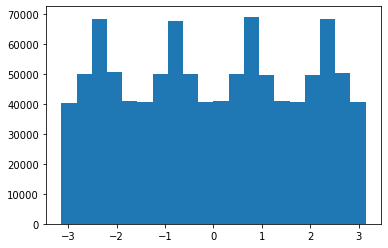

In [36]:
# b) On regarde si les vecteurs sont répartis de manière uniforme

test = generer_complexe(10**6)
plt.hist(np.angle(test), bins=20)

In [37]:
# b) on observe que la distribution n'est pas uniforme

In [38]:
# g) On observe qu'il y a beaucoup plus de valeurs en pi/4 modulo pi/2 ce qui est parfaitement normal car on tire les vecteurs
#    uniformement dans le carré [-1,1]² et non dans le cercle de rayon 1 ce qui fait qu'il y a plus de vecteurs avec un angle de
#    de pi/4 que de vecteur avec un angle de 0 car comme les vecteurs sont tirés uniformément, il y a plus de chance de
#    tomber sur un vecteur placé sur le segment entre (0,0) et (1,1) de longueur racine de 2 que sur le segment entre (0,0) et
#    et (1,0) de longueur 1

In [39]:
# c)

def generer_complexe_monte_carlo(N):
    
    temp = generer_complexe(N)
    return np.array([temp[i] for i in range(len(temp)) if (temp[i].real**2 + temp[i].imag**2 <= 1)])

(array([30152., 38909., 53786., 38984., 30625., 30238., 39189., 53966.,
        38877., 30222., 30225., 38814., 53873., 39055., 30360., 30432.,
        38927., 54268., 38680., 30012.]),
 array([-3.14158129e+00, -2.82742338e+00, -2.51326547e+00, -2.19910756e+00,
        -1.88494965e+00, -1.57079174e+00, -1.25663383e+00, -9.42475918e-01,
        -6.28318007e-01, -3.14160096e-01, -2.18583243e-06,  3.14155725e-01,
         6.28313635e-01,  9.42471546e-01,  1.25662946e+00,  1.57078737e+00,
         1.88494528e+00,  2.19910319e+00,  2.51326110e+00,  2.82741901e+00,
         3.14157692e+00]),
 <BarContainer object of 20 artists>)

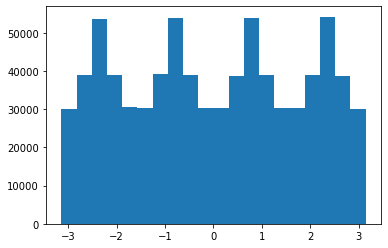

In [40]:
# c)

test2 = generer_complexe_monte_carlo(10**6)
plt.hist(np.angle(test2),bins=20)

In [41]:
# c) On observe que la distribution n'est toujours pas uniforme

In [42]:
# d) On définit la fonction comparer pour obtenir la différence entre la proportion n/N et pi/4

def comparer(n):
    
    temp1 = generer_complexe(n)
    temp2 = np.array([temp1[i] for i in range(len(temp1)) if (temp1[i].real**2 + temp1[i].imag**2 <= 1)])
    return abs(len(temp2)/len(temp1) - np.pi/4)

In [43]:
# d) On observe que n/N est "proche" de pi/4

comparer(1000000)

0.01543916339744833

In [44]:
import scipy

In [45]:
# e) On définit la fonction proba qui donne la probabilité qu'un vecteur de R^n pris au hasard dans le cube unitaire soit dans
#    la boule unitaire de R^n

def proba(n):
    
    volume_boule = np.pi**(n/2) / scipy.special.gamma(n/2 + 1)
    volume_cube = 2**n
    
    return volume_boule/volume_cube

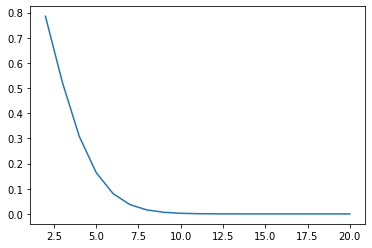

In [46]:
# e) On trace la fonction proba en fonction des dimensions n

x = np.array([i for i in range(2,21)])
plt.plot(x,np.array([proba(x[i]) for i in range(len(x))]))

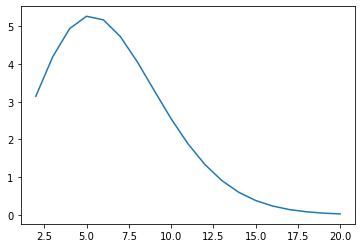

In [47]:
# e) On observe que cette probabilité tend vers 0 quand n devient grand

plt.plot(x,np.array([np.pi**(x[i]/2) / scipy.special.gamma(x[i]/2 + 1) for i in range(len(x))]))

In [48]:
# e) On observe que plus n devient grand et plus le volume de la boule unitaire diminue et le volume du cube unitaire augmente
#    car il est de 2^n croissant vers +inf. Donc leur rapport tend vers 0.

# On peut donc conclure que c'est une mauvaise idée d'obter pour cette stratégie quand n devient grand car la probabilité 
# d'avoir des vecteurs dans la boule unitaire (pour qu'il soit accepté à l'étape 2) devient très faible.

In [49]:
# f)

def generer_vecteur_aleatoire(n):
    
    temp = np.random.randn(n)
    
    return temp/np.linalg.norm(temp)

In [50]:
# f) On définit la fonction transform_complex qui va transformer un vecteur de R^2 en complexe pour calculer son angle.

def transform_complex(x):
    return x[0] + x[1]*1.j

(array([49732., 49889., 50043., 49726., 49845., 50163., 49941., 50336.,
        50111., 49973., 49633., 50117., 49610., 49973., 49903., 49948.,
        50217., 50461., 50092., 50287.]),
 array([-3.14159137e+00, -2.82743227e+00, -2.51327316e+00, -2.19911405e+00,
        -1.88495495e+00, -1.57079584e+00, -1.25663673e+00, -9.42477627e-01,
        -6.28318521e-01, -3.14159414e-01, -3.07798837e-07,  3.14158799e-01,
         6.28317905e-01,  9.42477012e-01,  1.25663612e+00,  1.57079522e+00,
         1.88495433e+00,  2.19911344e+00,  2.51327254e+00,  2.82743165e+00,
         3.14159076e+00]),
 <BarContainer object of 20 artists>)

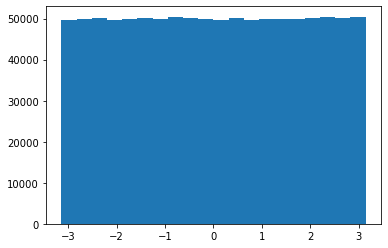

In [52]:
test_final = [transform_complex(generer_vecteur_aleatoire(2)) for i in range(10**6)]
plt.hist(np.angle(test_final),bins=20)

In [53]:
# f) On observe bien que la distribution des angles est uniforme cette fois entre -pi et pi